# Try for vectorized integration 

Using scipy.integrate.quad_vec.  First issue is that typically this takes a vector valued function of a single variable and integrates...  How do we switch it to take a vector and return a vector and integrate?

Well, we still integrate all functions from x = a, b... So there is still only one integration variable.  So it should be doable, just need to make vector function correctly.  This involves passing the array of Z values as an extra argument to the integrator

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad_vec
from slab import SlabExact, plot_complex, plotlogf
plt.style.use('dark_background')
%matplotlib widget

In [17]:
A = SlabExact(scale=1e-5, Ts=[15, 1, 8, 1, 15],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[100, 40, 300, 40, 100],
              symmetric=True, wl=1.5e-4)

In [18]:
B = 1.25
def quadratic_piecewise(x):
    conds = [(x<-B), ((-B<=x)*(x<=B)), (x>B)]
    funcs = [0, lambda x: 1 - (x/B)**2, 0]
    return np.piecewise(x, conds, funcs)

f0 = quadratic_piecewise

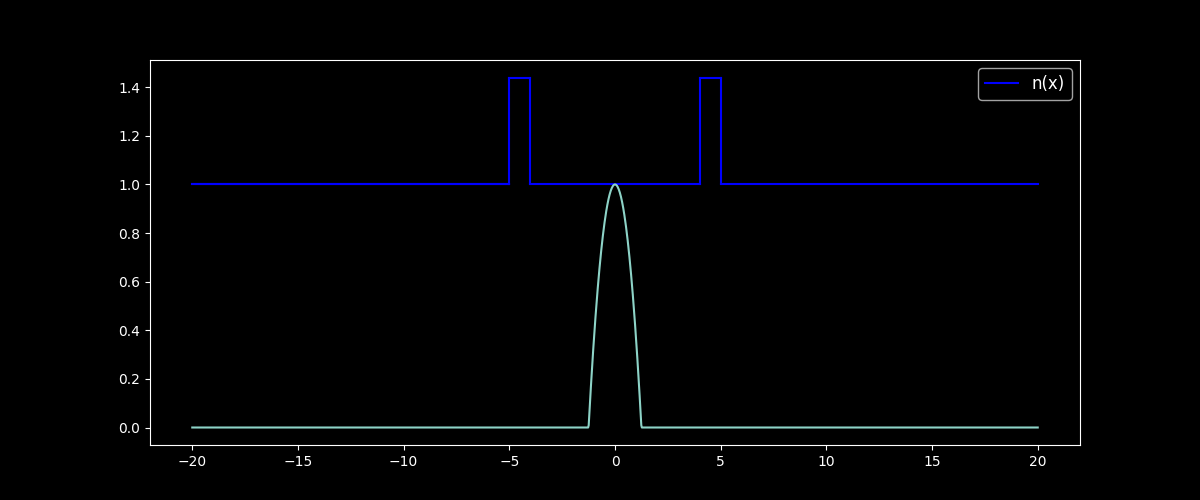

In [4]:
A.plot_refractive_index();
A.add_1d_plot(f0, ax=plt.gca())

In [5]:
def F(x):
    return f0(x) * np.array([1, x, np.sin(x)])

In [6]:
quad_vec(F, 0, 1)[0]

array([0.78666667, 0.34      , 0.31682136])

In [7]:
def FZ(x, Z):
    return f0(x) *  A.evaluate_fields_Z(Z, x, field_type='TE', mode_type='radiation', sign='+1', paper_method=False)

In [8]:
Zs = np.linspace(0.001,1,10) + 1j

In [9]:
1/2*quad_vec(FZ, -B, B, workers=-1, args=(Zs,))[0]

array([0.02754133+0.00010752j, 0.02499407+0.01169016j,
       0.01783571+0.02124197j, 0.00722478+0.02700355j,
       0.00500017-0.02777175j, 0.01657226-0.02320372j,
       0.02521872-0.01397803j, 0.02912293-0.00171996j,
       0.02729212+0.01126015j, 0.0198128 +0.02233492j])

In [10]:
A.radiation_transform(Zs, f0, Lx=-B, Rx=B)

array([0.02754133+0.00010752j, 0.02499407+0.01169016j,
       0.01783571+0.02124197j, 0.00722478+0.02700355j,
       0.00500017-0.02777175j, 0.01657226-0.02320372j,
       0.02521872-0.01397803j, 0.02912293-0.00171996j,
       0.02729212+0.01126015j, 0.0198128 +0.02233492j])

In [11]:
xs, ys = np.linspace(.1, 1, 100), np.linspace(.1,1,100)
Xs, Ys = np.meshgrid(xs,ys)
Z2D = Xs + 1j * Ys

In [12]:
A.radiation_transform?

Signature:
A.radiation_transform(
    Zs,
    f0,
    Lx=None,
    Rx=None,
    field_type='TE',
    sign='+1',
    paper_method=False,
    **intargs,
)
Docstring:
Return transform coefficients (alphas) for input field f0 from Zs using
scipy vectorized integration techniques.
File:      ~/local/slab/slab.py
Type:      method

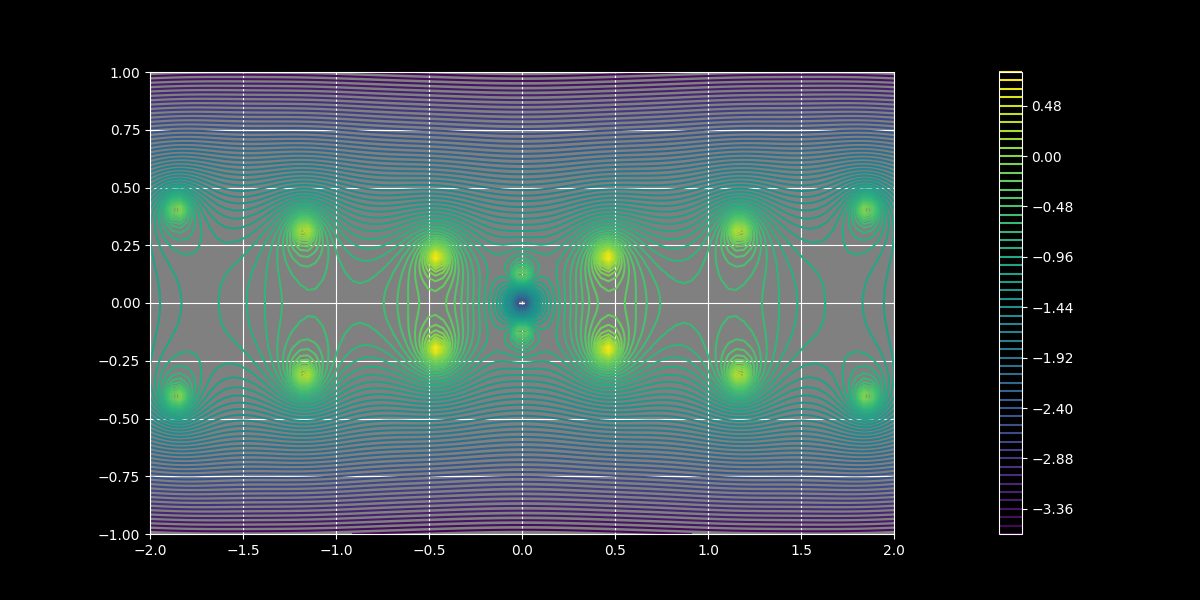

In [14]:
plotlogf(A.radiation_transform, -2, 2, -1, 1, f0, -B, B, 'TE', '+1', False, 
         iref=100, rref=100, levels=70,)

In [17]:
A.spectral_integrand?

Signature:
A.spectral_integrand(
    Zs,
    f0,
    x=0,
    z=0,
    Lx=-inf,
    Rx=inf,
    class_A_only=False,
    class_B_only=False,
    field_type='TE',
    paper_method=False,
)
Docstring: Return integrand of radiation expansion of f0 at Zs, x, z.
File:      ~/local/slab/slab.py
Type:      method

In [19]:
A.spectral_integrand(1, f0, Lx=-B, Rx=B, class_A_only=True)

(0.4257276068457321+0j)

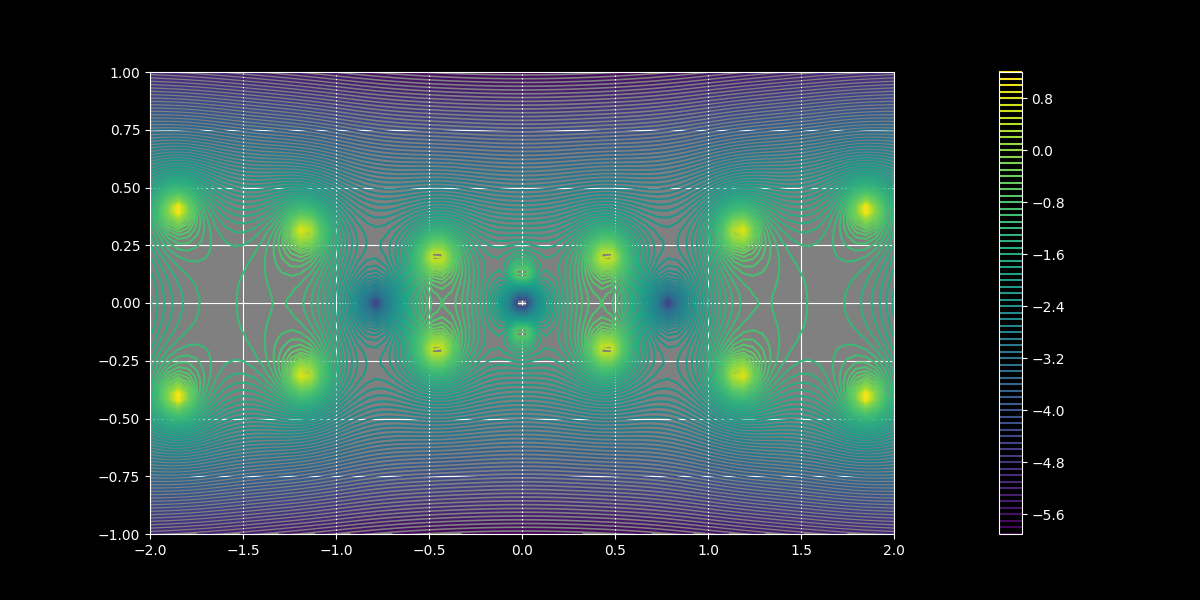

In [25]:
plotlogf(A.spectral_integrand, -2, 2, -1, 1, f0, 2, 0, -B, B, True, False, 'TE', False, iref=80, rref=80, levels=75)

Values seem too small.  Let's check inside

In [54]:
F1 = A.fields_Z(6+1j, mode_type='radiation', paper_method=False)

In [55]:
F1(0,1)

array([[-0.00357256+0.00508883j]])

In [58]:
A.evaluate_fields_Z(6+1j, 0, 1, paper_method=False)

(-0.0035725560319872394+0.005088827364427109j)

In [57]:
A.evaluate_fields_Z?

Signature:
A.evaluate_fields_Z(
    Z,
    x,
    z=0,
    field_type='TE',
    mode_type='radiation',
    sign='+1',
    paper_method=True,
)
Docstring: Return value of field with propagation constant Zj(Z) at x, z=0.
File:      ~/local/slab/slab.py
Type:      method

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

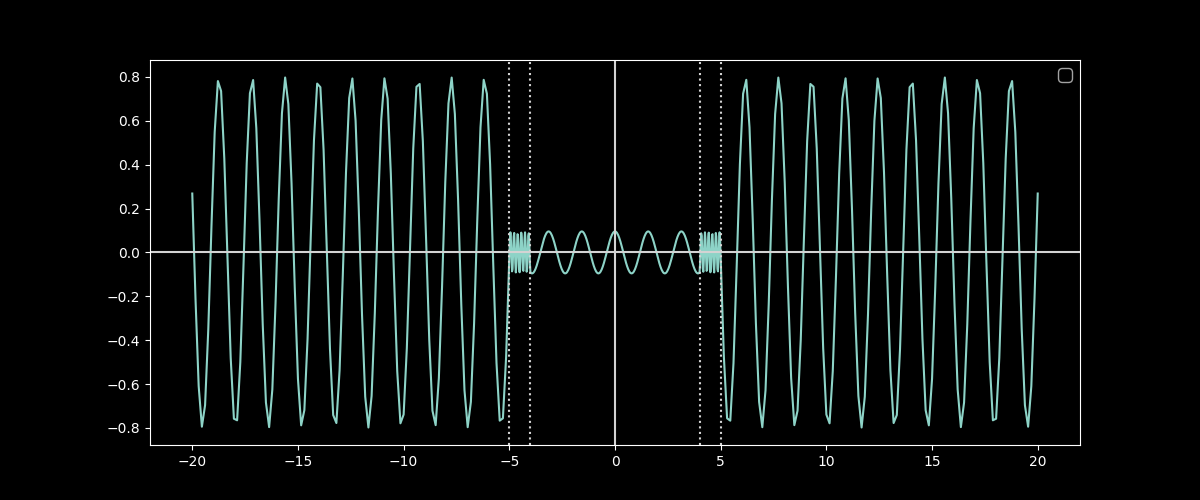

In [39]:
A.plot_field_1d(F1)